<a href="https://colab.research.google.com/github/NitikaBahl/feature-engineering/blob/main/training_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## display all columns of the dataframe
pd.pandas.set_option('display.max_columns',None)
## Display all rows of the dataframe
pd.pandas.set_option('display.max_rows',None)

In [ ]:
dataset=pd.read_csv('/content/train (1).csv')
print(dataset.shape)

(32614, 3)


In [ ]:
dataset.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


Missing Values

In [ ]:
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
for feature in features_with_na:
  print(feature,np.round(dataset[feature].isnull().mean(),4),'% missing values')

sub_category 0.0716 % missing values
crimeaditionalinfo 0.0002 % missing values


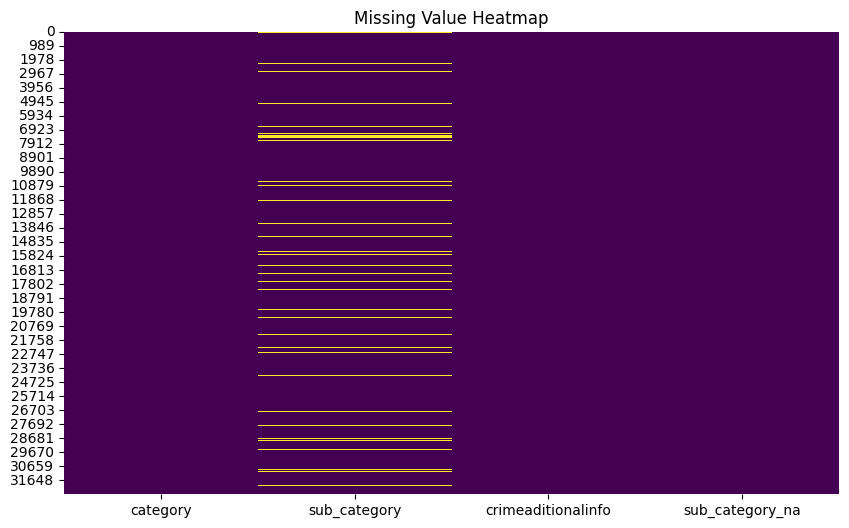

In [ ]:
# Heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

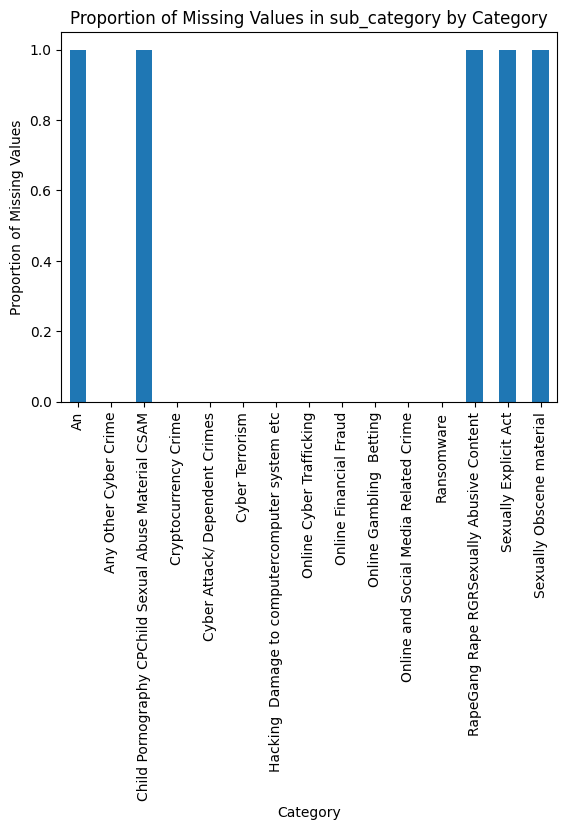

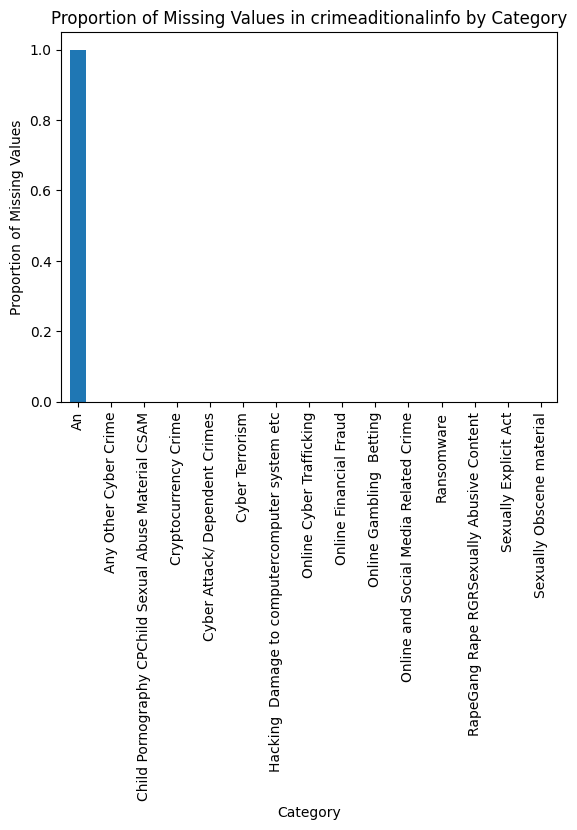

In [ ]:
data = dataset.copy()

# Identify features with missing values
features_with_na = ['sub_category', 'crimeaditionalinfo']

# Create binary indicators for missing values in these features
for feature in features_with_na:
    data[feature + '_missing'] = np.where(data[feature].isnull(), 1, 0)

# Plot the proportion of missing values in `sub_category` and `crimeaditionalinfo` by `category`
for feature in features_with_na:
    # Group by `category` and calculate the mean missing indicator for each feature
    missing_proportion = data.groupby('category')[feature + '_missing'].mean()

    # Plotting
    missing_proportion.plot(kind='bar')
    plt.title(f"Proportion of Missing Values in {feature} by Category")
    plt.xlabel("Category")
    plt.ylabel("Proportion of Missing Values")
    plt.show()

HOW MANY FETURES ARE NUMERICAL VARIABLES

In [ ]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
print('Number of numerical variables:',len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables: 1


,sub_category_na
0,0
1,0
2,0
3,0
4,0


In [ ]:
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25]
print('Discrete variables count:',len(discrete_feature))
print(discrete_feature)

Discrete variables count: 1


['sub_category_na']

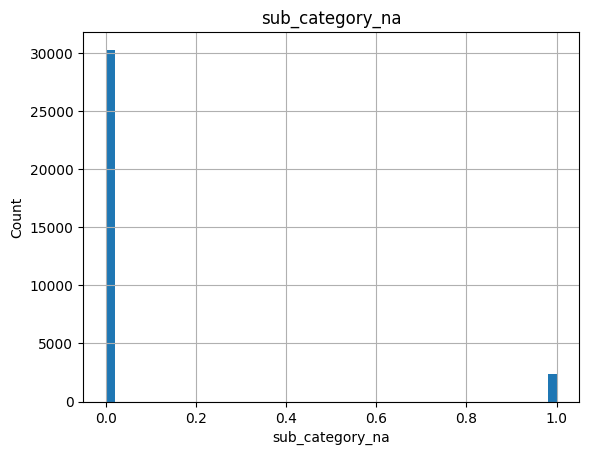

In [ ]:
for feature in discrete_feature:
  dataset[feature].hist(bins=50)
  plt.xlabel(feature)
  plt.ylabel('Count')
  plt.title(feature)
  plt.show()

In [ ]:
continous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('Continous variables count:',len(continous_feature))
print(continous_feature)

Continous variables count: 0
[]


outliers

In [ ]:
for features in numerical_features:
  data=dataset.copy()
  if 0 in data[features].unique():
    pass
  else:
    data[features]=np.log(data[features])
    data.boxplot(column=features)
    plt.ylabel(features)
    plt.title(features)
    plt.show()

In [ ]:
categorical_features = [features for features in dataset.columns if dataset[features].dtypes=='O']
print('Number of categorical variables:',len(categorical_features))
dataset[categorical_features].head()

Number of categorical variables: 3


,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [ ]:
for feature in categorical_features:
  print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))


The feature is category and number of categories are 15
The feature is sub_category and number of categories are 35
The feature is crimeaditionalinfo and number of categories are 30034


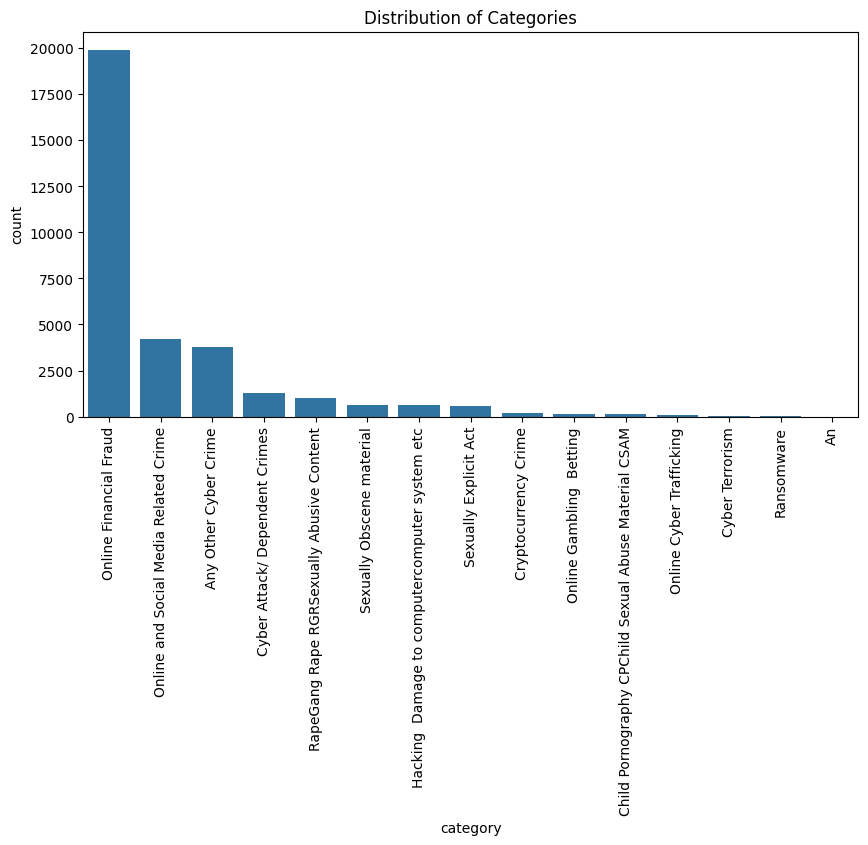

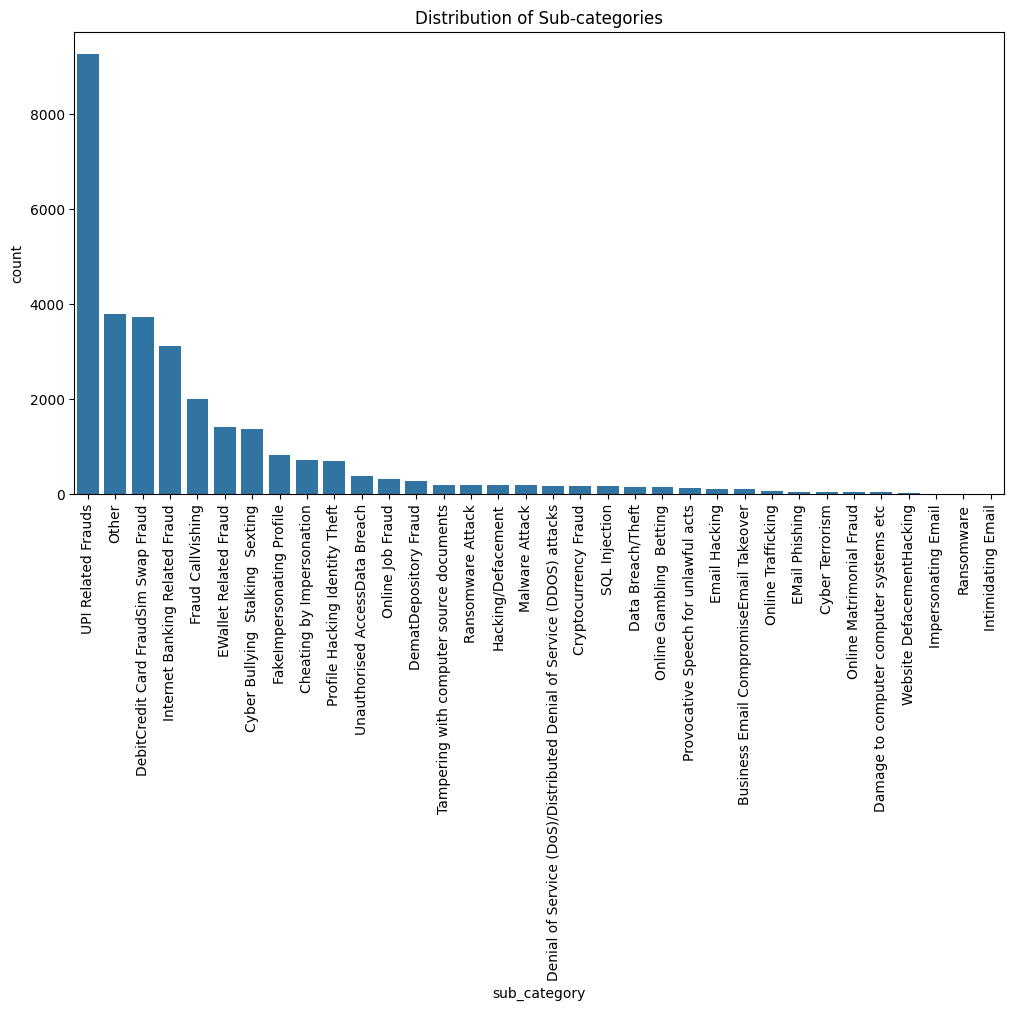

In [ ]:
# Count plot for 'category'
plt.figure(figsize=(10, 5))
sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xticks(rotation=90)
plt.show()

# Count plot for 'sub_category'
plt.figure(figsize=(12, 6))
sns.countplot(x='sub_category', data=dataset, order=dataset['sub_category'].value_counts().index)
plt.title('Distribution of Sub-categories')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def replace_cat_features(dataset,features_nan):
  data=dataset.copy()
  data[features_nan]=data[features_nan].fillna('Missing')
  return data

dataset=replace_cat_features(dataset,categorical_features)
dataset[categorical_features].isnull().sum()

,0
category,0
sub_category,0
crimeaditionalinfo,0


In [ ]:
for features in categorical_features:
  temp=dataset.groupby(features)['category'].count()/len(dataset)
  temp_df=temp[temp>0.01].index
  dataset[features]=np.where(dataset[features].isin(temp_df),dataset[features],'Rare_var')
  dataset[features].value_counts()
  print(features)

category
sub_category
crimeaditionalinfo


##Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[numerical_features])

MinMaxScaler()